In [18]:
import csv

# Open and read the CSV file
with open('Great Lakes Data/daily_preciptiation.csv', newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    
    # Skip the first 9 rows (header rows)
    for _ in range(9):  
        next(reader)
    
    # Initialize variables for weekly data
    count = 0
    weekly_precipitation = {}
    week_start_date = ""
    weekly_data = 0 

    # Iterate through the rows
    for row in reader:
        if count == 0:
            week_start_date = row[0]
        date = row[0]
        precip = row[3]  # Assuming column 3 has the precipitation value
        
        # Convert the precipitation value to float
        try:
            precip_value = float(precip)
        except ValueError:
            precip_value = 0  # In case of 'NA' or missing data, handle it as 0

        weekly_data += precip_value
        
        # Check if we've collected 7 days of data (1 week)
        if count % 7 == 0:
            # Sum the weekly data and calculate the average
            weekly_precipitation[week_start_date] = weekly_data / 7

            # Reset for the next week
            week_start_date = date  # Set the start date for the next week
            
        count += 1
    
print(weekly_precipitation)
#this has all the weekly data with key (str) YYYY-MM-DD
    

{'1940-01-01': 2.121428571428571, '1940-01-08': 5.317142857142857, '1940-01-15': 7.734285714285714, '1940-01-22': 8.725714285714284, '1940-01-29': 9.814285714285715, '1940-02-05': 12.781428571428568, '1940-02-12': 15.658571428571426, '1940-02-19': 17.43857142857143, '1940-02-26': 20.17142857142857, '1940-03-04': 20.978571428571424, '1940-03-11': 23.67428571428571, '1940-03-18': 25.65714285714285, '1940-03-25': 26.544285714285717, '1940-04-01': 29.50714285714286, '1940-04-08': 32.71857142857143, '1940-04-15': 36.35142857142857, '1940-04-22': 36.36714285714286, '1940-04-29': 38.59428571428572, '1940-05-06': 39.00714285714285, '1940-05-13': 42.89857142857142, '1940-05-20': 50.079999999999984, '1940-05-27': 51.871428571428545, '1940-06-03': 53.568571428571396, '1940-06-10': 54.45285714285711, '1940-06-17': 60.614285714285685, '1940-06-24': 63.27571428571425, '1940-07-01': 63.72999999999997, '1940-07-08': 66.92428571428567, '1940-07-15': 70.32571428571426, '1940-07-22': 73.03999999999996, '

In [ ]:
#David's Data things
#still need NTS (idk if I manually calculate or get it from Nikas)

import pandas as pd
import numpy as np
from collections import defaultdict

def findWaterLevel(file_path):
    data = pd.read_csv(file_path)
    monthly_lvl_dict = defaultdict(list)

    annual_max_lvl_dict = dict()
    annual_min_lvl_dict = dict()
    annual_avg_lvl_dict = dict()
    for index, row in data.iterrows():
        year = row[0]
        for i in range(1,13):
            monthly_lvl_dict[year].append(row[i])
        annual_avg_lvl_dict[year] = sum(row[1::])/12
        annual_max_lvl_dict[year] = max(row[1::])
        annual_min_lvl_dict[year] = min(row[1::])
    return monthly_lvl_dict, annual_avg_lvl_dict , annual_max_lvl_dict, annual_min_lvl_dict

def monthlyVals(file_path):
    #returns a dictionary with key = year and value = len(12) array w/ index corresponding to month
    data = pd.read_csv(file_path)
    yearlyLvl = dict()
    for index, row in data.iterrows():
        currArr = []
        for i in range(1,13):
            currArr.append(row[i])
        year = row[0]
        yearlyLvl[year] = currArr
    return yearlyLvl


#ontario beginning of month
file_path_waterLvl = "/content/drive/MyDrive/Great Lakes Data/LakeOntario_BeginningOfMonthWaterLevels_1900to2025 (1).csv"

monthly_h_ontario_dict, annual_avg_h_ontario_dict, annual_max_h_ontario_dict, annual_min_h_ontario_dict = findWaterLevel(file_path_waterLvl)

#the vals are np values so idk

# avgLevel = "/content/LakeOntario_MonthlyMeanWaterLevels_1918to2024.csv"
# monthlyMeanLvl= monthlyVals(avgLevel)

def monthlyValsRunoff(file_path):
  data = pd.read_csv(file_path)
  yearlyRunoff = defaultdict(list)
  for index, row in data.iterrows():
      yearlyRunoff[row[0]].append(row[2])
  return yearlyRunoff

file_path_precipitation = "/content/drive/MyDrive/Great Lakes Data/prc_ont_basn_mon (1).csv"
monthlyPrecipitation_dict = monthlyVals(file_path_precipitation)

file_path_evaporation = "/content/drive/MyDrive/Great Lakes Data/evaporation_ont.csv"
monthlyEvaporation_dict = monthlyVals(file_path_evaporation)

file_path_runoff = "/content/drive/MyDrive/Great Lakes Data/runoff_ont_arm.csv"
monthlyRunoff_dict = monthlyValsRunoff(file_path_runoff)

# Section 4.2 (equation 2)
# NBS = P - E + R

def calculate_NBS(monthlyPrecipitation_dict, monthlyEvaporation_dict, monthlyRunoff_dict):
    monthly_NBS_dict = defaultdict(list)
    three_month_NBS_dict = defaultdict(list)
    #has key of year, value of 3, 4 month segments
    annual_max_NBS_dict = dict()
    annual_min_NBS_dict = dict()
    annual_avg_NBS_dict = dict()
    for year in monthlyPrecipitation_dict:
        if year not in monthlyEvaporation_dict or year not in monthlyRunoff_dict:
            continue
        currPrecipitation, currEvaporation, currRunoff= monthlyPrecipitation_dict[year] , monthlyEvaporation_dict[year], monthlyRunoff_dict[year]
        for i in range(12):
            currVal = currPrecipitation[i] - currEvaporation[i] + currRunoff[i]
            monthly_NBS_dict[year].append(currVal)
        row = monthly_NBS_dict[year]
        for i in range(4):
            currVal = sum(row[1 + i*3 : 1 + (i+1)*3])/3
            three_month_NBS_dict[year].append(currVal)
        #three
        annual_avg_NBS_dict[year] = sum(row)/12
        annual_max_NBS_dict[year] = max(row)
        annual_min_NBS_dict[year] = min(row)
    return monthly_NBS_dict, three_month_NBS_dict, annual_avg_NBS_dict, annual_max_NBS_dict, annual_min_NBS_dict

monthly_nbs_ontario_dict, three_month_nbs_ontario_dict, annual_avg_nbs_ontario_dict, annual_max_nbs_ontario_dict, annual_min_nbs_ontario_dict = calculate_NBS(monthlyPrecipitation_dict, monthlyEvaporation_dict, monthlyRunoff_dict)

print(monthly_nbs_ontario_dict)
print(three_month_nbs_ontario_dict)
print(annual_max_nbs_ontario_dict)
print(annual_min_nbs_ontario_dict)

<ipython-input-19-1fd52e75561b>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year = row[0]
<ipython-input-19-1fd52e75561b>:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_lvl_dict[year].append(row[i])
<ipython-input-19-1fd52e75561b>:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  currArr.append(row[i])
<ipython-input-19-1fd52e75561b>:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In 

defaultdict(<class 'list'>, {1950.0: [1620.15, 947.25, 2123.76, 3085.9900000000002, 917.72, 628.2099999999999, 384.97, 315.20000000000005, 385.2, 502.37, 1112.5600000000002, 1521.31], 1951.0: [1711.9, 1851.11, 2616.7599999999998, 3305.6899999999996, 999.12, 601.13, 756.02, 331.38, 353.96, 357.40000000000003, 908.3, 1085.6100000000001], 1952.0: [1657.0600000000002, 1501.43, 2174.49, 2514.63, 1207.16, 586.62, 422.53000000000003, 285.12, 291.37, 325.57, 492.49, 1026.51], 1953.0: [920.45, 1055.03, 1923.3700000000001, 1392.93, 1727.94, 562.49, 340.43, 407.78, 335.47, 266.8, 358.21000000000004, 754.93], 1954.0: [555.85, 2063.99, 2103.66, 2888.3599999999997, 1528.26, 656.6800000000001, 280.96000000000004, 280.1, 430.63, 762.14, 904.65, 1273.67], 1955.0: [1070.6799999999998, 835.37, 3057.79, 2580.89, 679.2099999999999, 442.97, 235.08, 285.57, 191.63, 1196.27, 1236.1999999999998, 832.54], 1956.0: [550.6600000000001, 858.6899999999999, 2413.65, 3619.2799999999997, 2311.0, 943.9599999999999, 462.

In [ ]:
# annual max, average, and min flow
def riverCalc(file_path):
    data = pd.read_csv(file_path)
    monthly_flow_dict = defaultdict(list)
    three_month_dict = defaultdict(list)
    #has key of year, value of 3, 4 month segments
    annual_max_flow_dict = dict()
    annual_min_flow_dict = dict()
    annual_avg_flow_dict = dict()
    for index, row in data.iterrows():
        year = row[0]
        for i in range(1,13):
            monthly_flow_dict[year].append(row[i])
        for i in range(4):
            currVal = sum(row[1 + i*3 : 1 + (i+1)*3])/3
            three_month_dict[year].append(currVal)
        annual_avg_flow_dict = row[len(row) - 3]
        annual_max_flow_dict[year] = row[len(row) - 2]
        annual_min_flow_dict[year] = row[len(row) - 1 ]
    return monthly_flow_dict, three_month_dict, annual_avg_flow_dict , annual_max_flow_dict, annual_min_flow_dict


# Niagra River flow (Q into Ontario Lake)
nia_river_path = "/content/drive/MyDrive/Great Lakes Data/NiagaraRiver_MonthlyFlow_1900to2020.csv"
river_month_q_nia_dict, river_three_month_avg_q_nia_dict, river_annual_avg_q_nia_dict, river_annual_max_q_nia_dict, river_annual_min_q_nia_dict = riverCalc(nia_river_path)

# Ottawa river (Q for spring and ice jams)
ott_river_path = "/content/drive/MyDrive/Great Lakes Data/ottawa_river_discharge.csv"
river_month_q_ott_dict, river_three_month_avg_q_ott_dict, river_annual_avg_q_ott_dict, river_annual_max_q_ott_dict, river_annual_min_q_ott_dict = riverCalc(ott_river_path)


# Section 4.2 (equation 6)
# NTS = NBS + Qin

monthlyNTS_dict = {}


def calculate_nts(monthly_q_dict, three_month_q_dict, monthlyNBS_dict, three_month_NBS_dict):
    three_month_nts_dict = defaultdict(list)
    annual_nts_avg_dict = dict()
    annual_nts_max_dict = dict()
    annual_nts_min_dict = dict()

    for year in monthlyNBS_dict:
        if int(year) not in monthly_q_dict:
            continue
        row = [0]*12
        curr_q, curr_nbs = monthly_q_dict[year], monthlyNBS_dict[year]
        for i in range(12):
            row[i] += curr_q[i] + curr_nbs[i]

        #row has the NBS per month
        for i in range(4):
            currVal = sum(row[1 + i*3 : 1 + (i+1)*3])/3
            three_month_nts_dict[year].append(currVal)
        annual_nts_avg_dict[year] = sum(row)/12
        annual_nts_max_dict[year] = max(row)
        annual_nts_min_dict[year] = min(row)

    return three_month_nts_dict, annual_nts_avg_dict, annual_nts_max_dict, annual_nts_min_dict

three_month_nts_now_ontario_dict, annual_nts_now_ontario_dict, annual_nts_min_ontario_dict, annual_nts_max_ontario_dict = calculate_nts(
    river_month_q_nia_dict, river_three_month_avg_q_nia_dict, monthly_nbs_ontario_dict,three_month_nbs_ontario_dict)

print(three_month_nts_now_ontario_dict)
print(annual_nts_now_ontario_dict)



defaultdict(<class 'list'>, {1950.0: [7789.0, 6703.633333333334, 5997.59, 4717.956666666666], 1951.0: [8554.519999999999, 7232.09, 6350.913333333333, 4721.303333333333], 1952.0: [8813.516666666666, 7602.103333333333, 6707.353333333333, 4546.333333333333], 1953.0: [7697.110000000001, 7210.286666666667, 6403.349999999999, 4314.38], 1954.0: [8242.003333333334, 7098.633333333334, 6587.623333333333, 4942.7733333333335], 1955.0: [8601.35, 6909.086666666667, 6541.156666666667, 4636.246666666667], 1956.0: [7697.206666666666, 7402.443333333333, 6390.126666666667, 4218.990000000001], 1957.0: [6885.233333333334, 6721.946666666667, 5837.926666666667, 4185.766666666666], 1958.0: [6536.639999999999, 6008.606666666667, 5752.69, 3826.686666666667], 1959.0: [7362.556666666666, 6085.66, 5474.13, 4433.349999999999], 1960.0: [7719.183333333333, 6952.009999999999, 5887.383333333334, 3900.2966666666666], 1961.0: [7280.9800000000005, 7347.94, 6133.329999999999, 4084.8833333333337], 1962.0: [6695.07, 5915.066

<ipython-input-32-28a031d668ab>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  year = row[0]
<ipython-input-32-28a031d668ab>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  monthly_flow_dict[year].append(row[i])
<ipython-input-32-28a031d668ab>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annual_avg_flow_dict = row[len(row) - 3]
<ipython-input-32-28a031d668ab>:18: FutureWarning: Series.__getitem__ treating keys as positions

In [ ]:
# section 5.2.1

# Number of baffles
N = 50
# z1 = A0 * r where A0 = amount of outflow, r is number of baffles above surface

# Section 5.2.2

# A_NTS_max, A_NTS_av, A_NTS_min
# W_NTS_max, W_NTS_av, W_NTS_min

def calculate_q_change_1(three_month_nts_now, annual_nts_avg, annual_nts_max, annual_nts_min,
                                  m1, z1, m2, z2):
    """
    Calculate the change in outflow based on the rule curves.

    Parameters:
        nts_now (float): Current Net Total Supply (NTS).
        nts_max (float): Maximum NTS (e.g., historical max).
        nts_avg (float): Average NTS.
        nts_min (float): Minimum NTS (e.g., historical min).
        m1 (float): Scaling factor for NTS above normal.
        z1 (float): Adjustment factor for NTS above normal.
        m2 (float): Scaling factor for NTS below normal.
        z2 (float): Adjustment factor for NTS below normal.

    Returns:
        float: Change in outflow (Delta Q_out).
    """
    monthly_delta_q_dict = {}
    for year in annual_nts_avg:
        q_list = []
        for three_month_nts_now_individual in three_month_nts_now[year]:
            if three_month_nts_now_individual >= annual_nts_avg[year]:
                # NTS is above normal
                delta_q_out = z1 * ((three_month_nts_now_individual - annual_nts_avg[year]) / (annual_nts_max[year] - annual_nts_avg[year])) ** m1
            else:
                # NTS is below normal
                delta_q_out = - z2 * ((annual_nts_avg[year] - three_month_nts_now_individual) / (annual_nts_avg[year] - annual_nts_min[year])) ** m2
            q_list.append(delta_q_out)
        print(q_list)
    return delta_q_dict

m1 = 1.0  # Example scaling factor for above normal
z1 = 1.0  # Example adjustment factor for above normal
m2 = 1.0  # Example scaling factor for below normal
z2 = 1.0  # Example adjustment factor for below normal



# Calculate change in outflow for each month
delta_q_dict = calculate_q_change_1(three_month_nts_now_ontario_dict, annual_nts_now_ontario_dict,
                                          annual_nts_now_ontario_dict,  annual_nts_max_ontario_dict, m1, z1, m2, z2)

# MAKE DELTA Q A DICT
print(delta_q_dict)

[inf, -0.21195713418960202, -0.9757777699645426, -2.3601267186487207]
[inf, -0.09796497292279516, -0.9051755857821395, -2.3979959662828887]
[inf, inf, -0.827433469984676, -2.844705992174311]
[inf, inf, -0.6336614892831531, -2.907529142624924]
[inf, -0.11932158170557321, -0.5867533111005244, -2.0913326345878995]
[inf, -0.3114936191169539, -0.6069279688236049, -2.1365011134426792]
[inf, inf, -0.45100820987510687, -2.3445734586133917]
[inf, inf, -0.6879873178487238, -2.5184715681051686]
[inf, -0.04132892369112029, -0.5446246832891399, -4.332378420723134]
[inf, -0.21309961583345904, -0.7613595102511649, -1.6944583490850085]
[inf, inf, -0.7819452873425984, -2.758890226471534]
[inf, inf, -0.4245629501988648, -2.0663247075481466]
[inf, -0.19024129266887063, -0.7275115678450541, -4.076992646894909]
[inf, inf, -0.7042495136885261, -2.281968397369781]
[inf, inf, -0.6729568028210405, -3.031985894798709]
[inf, -0.1614661118394826, -0.5345504293346752, -2.0113041720862492]
[inf, -0.0028573542954884

<ipython-input-40-b7075b046544>:36: RuntimeWarning: divide by zero encountered in scalar divide
  delta_q_out = z1 * ((three_month_nts_now_individual - annual_nts_avg[year]) / (annual_nts_max[year] - annual_nts_avg[year])) ** m1


In [ ]:

# section 5.2.3
def calculate_q_change_2(monthly_lvl_dict, annual_avg_lvl_dict , annual_max_lvl_dict, annual_min_lvl_dict, m3, m4, z3, z4):
    for key in yearlyLvl:
        currArr = []
        for hNow in yearlyLvl[key]:
            currVal = 0
            if hNow > totalAvg:
                currVal = z3 * (hNow - totalAvg) / (totalMax - totalAvg)
            else:
                currVal = - z4 * (totalAvg - hNow) / (totalAvg - totalMin)
            currArr.append(currVal)
        yearlyOutChange_dict[key] = currArr
    return yearlyOutChange_dict

m3 = 1.0
m4 = 1.0
z3 = 1.0
z4 = 1.0

calculate_q_change_2(monthly_h_ontario_dict, annual_avg_h_ontario_dict, annual_max_h_ontario_dict, annual_min_h_ontario_dict)

#section 5.3.1
def precipitationChange(yearlyPrecipitation,z5):
    precipitationOutChange = dict()
    for key in yearlyPrecipitation:
        newArr = [0] * 12
        currArr = yearlyPrecipitation[key]
        for i,n in enumerate(currArr):
            newArr[i] += n * z5
        precipitationOutChange[key] = newArr
    return precipitationOutChange

#how do I do the winds

#section 5.4.1
#assume this also accounts for the ice jams
def riverChange(riverLvl, riverAvg, riverMax, riverMin, z7):
    precipitationOutChange = dict()
    for key in riverLvl:
        newArr = [0] * 12
        currArr = riverLvl[key]
        for i,n in enumerate(currArr):
            currVal = 0
            if n > riverAvg:
                currVal = -z7 * (n - riverAvg) / (riverMax - riverAvg)
            else:
                currVal = z7 * (riverAvg - n) / (riverAvg - riverMin)
            newArr[i] += currVal
        precipitationOutChange[key] = newArr
    return precipitationOutChange

Streaming output truncated to the last 5000 lines.
 -7.33207600e-263 -3.40587818e+003] obj j [ 0.00000000e+00  1.42004435e+08 -1.47989631e+00 -0.00000000e+00
 -0.00000000e+00 -3.44446536e+03]
obj i:  [ 0.00000000e+000  1.80902481e+008 -2.78621868e+000 -0.00000000e+000
 -7.33207600e-263 -3.40587818e+003] obj j [ 0.00000000e+00  1.97775634e+08 -3.74678559e+00 -0.00000000e+00
 -0.00000000e+00 -3.38781308e+03]
obj i:  [ 0.00000000e+000  1.80902481e+008 -2.78621868e+000 -0.00000000e+000
 -7.33207600e-263 -3.40587818e+003] obj j [ 0.00000000e+00  1.87696843e+08 -5.49671595e+00 -0.00000000e+00
 -0.00000000e+00 -3.36443972e+03]
obj i:  [ 0.00000000e+000  1.80902481e+008 -2.78621868e+000 -0.00000000e+000
 -7.33207600e-263 -3.40587818e+003] obj j [ 1.96741831e+12  1.88693115e+08 -6.16872412e-01 -0.00000000e+00
 -0.00000000e+00 -3.49783282e+03]
obj i:  [ 0.00000000e+000  1.80902481e+008 -2.78621868e+000 -0.00000000e+000
 -7.33207600e-263 -3.40587818e+003] obj j [ 0.00000000e+00  1.47801568e+08 -2

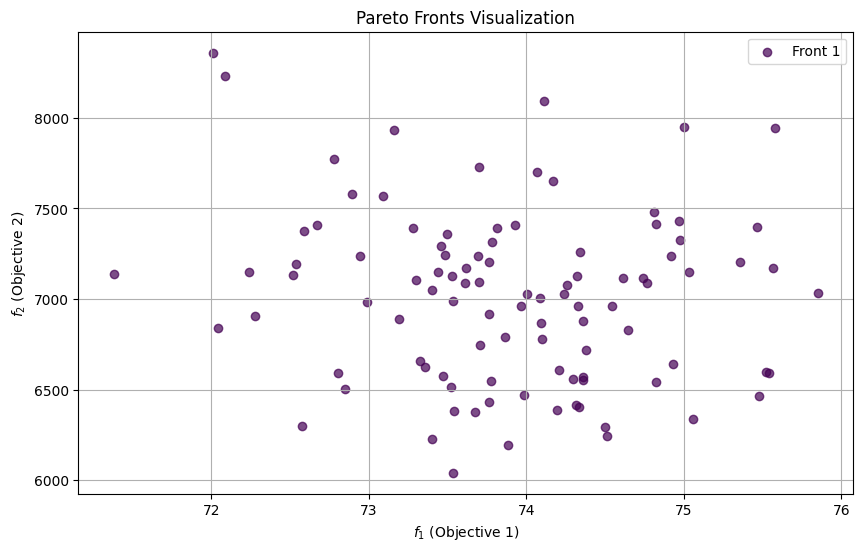

In [ ]:
# LOOK AT THIS CELL (cell below is AI generated)
import numpy as np
import matplotlib.pyplot as plt
import math
def objective_functions(H, Q):
   # f1 = H + 1
   # f2 = (H-2) ** 2
    #f3 = H + Q
    U_1 = 51388 * (0.53 * (H - 74.7) - 0.7 * Q ** 2) if H >= 74.7 else 0
    C_1 = 51388*(0.05*(H - 74.9) ** 2) if H >= 74.9 else 0
    f1 = -(U_1 - C_1)

    # f2: Yield function of people managing docks (near Montreal harbor)
    f2 = -np.exp(-10.26 * abs(H - 73.56)) + 3.45 * Q**2

    # f3: Yield function of environmentalists
    f3 = -np.exp(-0.76 * (H - 74.83))

    # f4: Yield function of property owners on the shores of Lake Ontario
    f4 = -np.exp(-14.79 * abs(H - 74.56) - 3.68 * abs(Q - 7256)**2)

    # f5: Yield function of recreational boaters and fishing boats
    f5 = -np.exp(-5.89 * abs(H - 74.56) - 2.74 * abs(Q - 7256)**2)

    # f6: Yield function of hydro-power generation companies
    f6 = -46.35 * H

    # Return all objectives as a numpy array
    return np.array([f1, f2, f3, f4, f5, f6])

# Initialize population
def create_population(pop_size, n_var):
    return np.random.rand(pop_size, n_var) * 10 - 5

# Non-dominated sorting function
def non_dominated_sorting(population):
    pop_size = len(population)
    fronts = [[]]
    domination_counts = np.zeros(pop_size, dtype=int)
    dominated_solutions = [[] for _ in range(pop_size)]
    ranks = np.zeros(pop_size, dtype=int)

    for i in range(pop_size):
        for j in range(pop_size):
            if i != j:  # Skip self-comparison
                obj_i = objective_functions(*population[i])
                obj_j = objective_functions(*population[j])
                print("obj i: ", obj_i, "obj j", obj_j)
                if np.all(obj_i <= obj_j) and np.any(obj_i < obj_j):  # i dominates j
                    dominated_solutions[i].append(j)
                elif np.all(obj_j < obj_i) and np.any(obj_j < obj_i):  # j dominates i
                    domination_counts[i] += 1

        # If no solutions dominate i, it's part of the first Pareto front
        if domination_counts[i] == 0:
            ranks[i] = 0
            fronts[0].append(i)
    i = 0
    while fronts[i]:
        next_front = []
        for p in fronts[i]:
            for q in dominated_solutions[p]:
                domination_counts[q] -= 1
                if domination_counts[q] == 0:
                    ranks[q] = i + 1
                    next_front.append(q)
        i += 1
        fronts.append(next_front)

    return ranks, fronts[:-1]

pop_size = 100
n_var = 2
population = create_population(pop_size, n_var)

# Parameters for Lake Ontario simulation
H_mean = 74  # Average water level in feet
H_std = 1 # Standard deviation in feet (adjust for variability)
Q_mean = 7000  # Average flow rate in cubic meters per second
Q_std = 500  # Standard deviation for flow rate (adjust for variability)

# Number of samples to simulate
pop_size = 100
np.random.seed(42)
# Simulate the population of H and Q
H_values = np.random.normal(H_mean, H_std, pop_size)
Q_values = np.random.normal(Q_mean, Q_std, pop_size)
# Combine H and Q values into a population array
population_2 = np.vstack((H_values, Q_values)).T
print(population_2)

# Perform non-dominated sorting
ranks, fronts = non_dominated_sorting(population_2)
colors = plt.cm.viridis(np.linspace(0, 1, len(fronts)))
plt.figure(figsize=(10, 6))
for i, front in enumerate(fronts):
    solutions = population_2[front]
    plt.scatter(solutions[:, 0], solutions[:, 1], color=colors[i], label=f'Front {i + 1}', alpha=0.7)

print(ranks, fronts)

plt.title('Pareto Fronts Visualization')
plt.xlabel('$f_1$ (Objective 1)')
plt.ylabel('$f_2$ (Objective 2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# PCA implementation 

all_q_dict = dict()

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_q_standard = scaler.fit_transform(all_q_dict)  # Standardizing the data

pca = PCA(n_components=2)  # Number of components equal to number of variables
pca.fit(all_q_standard)

principal_components = pca.components_

In [ ]:
# Create a DataFrame to show how much each variable contributes to each principal component
pc_df = pd.DataFrame(pca.components_, 
                     columns=df.columns, 
                     index=[f"PC{i+1}" for i in range(df.shape[1])])

# Display principal component loadings
print(pc_df)

In [ ]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display explained variance for each principal component
print("Explained variance ratio:", explained_variance)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()


In [ ]:
# Find the absolute values of loadings for PC1
pc1_loadings = np.abs(pc_df.iloc[0])

# Sort variables by contribution to PC1
most_influential_variable = pc1_loadings.idxmax()
print(f"The variable with the highest contribution to PC1 is: {most_influential_variable}")
